In [2]:
# Imports
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.util import ngrams

In [3]:
stop_words = None
with open("../data/ro_stop_words.txt", "r", encoding="utf-8") as fp:
    stop_words = set(fp.read().split())

stop_words.update(['a', 'abia', 'acea', 'aceasta', 'această', 'aceea', 'aceeasi', 'acei', 'aceia', 'acel', 'acela', 'acelasi', 'acele', 'acelea', 'acest', 'acesta', 'aceste', 'acestea', 'acestei', 'acestia', 'acestui', 'aceşti', 'aceştia', 'adica', 'ai', 'aia', 'aibă', 'aici', 'al', 'ala', 'ale', 'alea', 'alt', 'alta', 'altceva', 'altcineva', 'alte', 'altfel', 'alti', 'altii', 'altul', 'am', 'anume', 'apoi', 'ar', 'are', 'as', 'asa', 'asta', 'astea', 'astfel', 'asupra', 'atare', 'atat', 'atata', 'atatea', 'atatia', 'ati', 'atit', 'atita', 'atitea', 'atitia', 'atunci', 'au', 'avea', 'avem', 'aveţi', 'avut', 'aş', 'aţi', 'ba', 'ca', 'cam', 'cand', 'care', 'careia', 'carora', 'caruia', 'cat', 'catre', 'ce', 'cea', 'ceea', 'cei', 'ceilalti', 'cel', 'cele', 'celor', 'ceva', 'chiar', 'ci', 'cind', 'cine', 'cineva', 'cit', 'cita', 'cite', 'citeva', 'citi', 'citiva', 'cu', 'cui', 'cum', 'cumva', 'cât', 'câte', 'câtva', 'câţi', 'cînd', 'cît', 'cîte', 'cîtva', 'cîţi', 'că', 'căci', 'cărei', 'căror', 'cărui', 'către', 'da', 'daca', 'dacă', 'dar', 'dat', 'dată', 'dau', 'de', 'deasupra', 'deci', 'decit', 'deja', 'desi', 'despre', 'deşi', 'din', 'dintr', 'dintr-', 'dintre', 'doar', 'doi', 'doilea', 'două', 'drept', 'dupa', 'după', 'dă', 'e', 'ea', 'ei', 'el', 'ele', 'era', 'eram', 'este', 'eu', 'eşti', 'face', 'fara', 'fata', 'fel', 'fi', 'fie', 'fiecare', 'fii', 'fim', 'fiu', 'fiţi', 'foarte', 'fost', 'fără', 'i', 'ia', 'iar', 'ii', 'il', 'imi', 'in', 'inainte', 'inapoi', 'inca', 'incit', 'insa', 'intr', 'intre', 'isi', 'iti', 'la', 'le', 'li', 'lor', 'lui', 'lângă', 'lîngă', 'm', 'ma', 'mai', 'mea', 'mei', 'mele', 'mereu', 'meu', 'mi', 'mie', 'mine', 'mod', 'mult', 'multa', 'multe', 'multi', 'multă', 'mulţi', 'mâine', 'mîine', 'mă', 'ne', 'ni', 'nici', 'nimeni', 'nimic', 'niste', 'nişte', 'noastre', 'noastră', 'noi', 'nostri', 'nostru', 'nou', 'noua', 'nouă', 'noştri', 'nu', 'numai', 'o', 'or', 'ori', 'oricare', 'orice', 'oricine', 'oricum', 'oricând', 'oricât', 'oricînd', 'oricît', 'oriunde', 'pai', 'parca', 'patra', 'patru', 'pe', 'pentru', 'peste', 'pic', 'pina', 'poate', 'pot', 'prea', 'prima', 'primul', 'prin', 'printr-', 'putini', 'puţin', 'puţina', 'puţină', 'până', 'pînă', 'sa', 'sa-mi', 'sa-ti', 'sai', 'sale', 'sau', 'se', 'si', 'sint', 'sintem', 'spate', 'spre', 'sub', 'sunt', 'suntem', 'sunteţi', 'sus', 'să', 'săi', 'său', 't', 'ta', 'tale', 'te', 'ti', 'tine', 'toata', 'toate', 'toată', 'tocmai', 'tot', 'toti', 'totul', 'totusi', 'totuşi', 'toţi', 'trei', 'treia', 'treilea', 'tu', 'tuturor', 'tăi', 'tău', 'u', 'ul', 'ului', 'un', 'una', 'unde', 'undeva', 'unei', 'uneia', 'unele', 'uneori', 'unii', 'unor', 'unora', 'unu', 'unui', 'unuia', 'unul', 'v', 'va', 'vi', 'voastre', 'voastră', 'voi', 'vom', 'vor', 'vostru', 'vouă', 'voştri', 'vreo', 'vreun', 'vă', 'zi', 'zice', 'îi', 'îl', 'îmi', 'în', 'îţi', 'ăla', 'ălea', 'ăsta', 'ăstea', 'ăştia', 'şi', 'ţi', 'ţie'])

In [4]:
df = pd.read_csv("../data/ro_news.csv")
df.head()

,source,title,text,url
0,evz.ro,Ministrul spulberă informațiile despre pensii....,Ministrul Muncii Violeta Alexandru a declarat ...,https://evz.ro/bomba-despre-pensii-ministrul-s...
1,adevarul.ro,G4Media: Klaus Iohannis i-a cerut premierului ...,"Preşedintele Klaus Iohannis i-a cerut, vineri,...",https://adevarul.ro/news/politica/g4media-klau...
2,puterea.ro,ULTIMA ORĂ: Medicul Mircea Beuran a fost REȚIN...,Medicul Mircea Beuran a fost reținut pentru 24...,https://www.puterea.ro/eveniment/ultima-ora-me...
3,agerpres.ro,"Iohannis, în Israel: România - angajată să con...","\nTrimisul special al AGERPRES, Florentina Pei...",https://www.agerpres.ro/politica/2020/01/21/io...
4,news.ro,Avertizări cod galben şi cod portocaliu de plo...,Meteorologii au emis saâmbătă seară avertizări...,https://www.news.ro/social/avertizari-cod-galb...


In [5]:
def clean(txt):
    tokens = word_tokenize(txt)
    tokens = [t for t in tokens if t not in stop_words]
    words = [word.lower() for word in tokens if word.isalpha()]
    return words

In [6]:
%%time
df['title_clean'] = df['title'].apply(clean)
df['text_clean'] = df['text'].apply(clean)

Wall time: 50 s


In [7]:
flatten_list = []
for sublist in df["text_clean"].to_list():
    flatten_list.extend(sublist)

In [17]:
top_30_bigram_series = (pd.Series(nltk.ngrams(flatten_list, 2)).value_counts())[:30]
top_30_trigram_series = (pd.Series(nltk.ngrams(flatten_list, 3)).value_counts())[:30]

<AxesSubplot:>

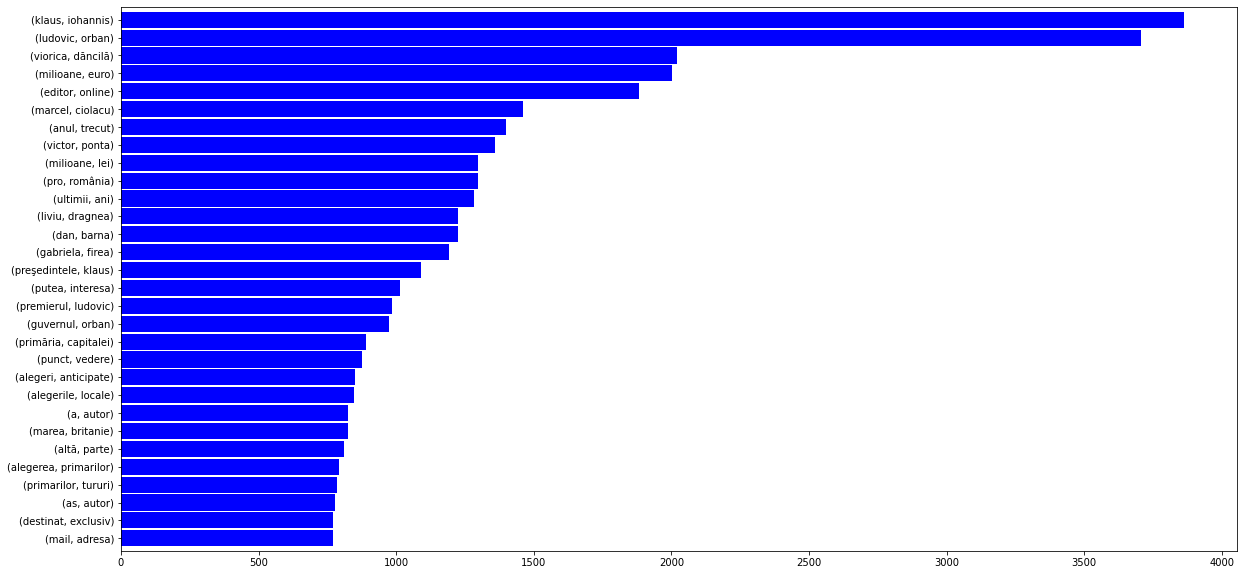

In [20]:
top_30_bigram_series.sort_values().plot.barh(color='blue', width=.9, figsize=(20, 10))

<AxesSubplot:>

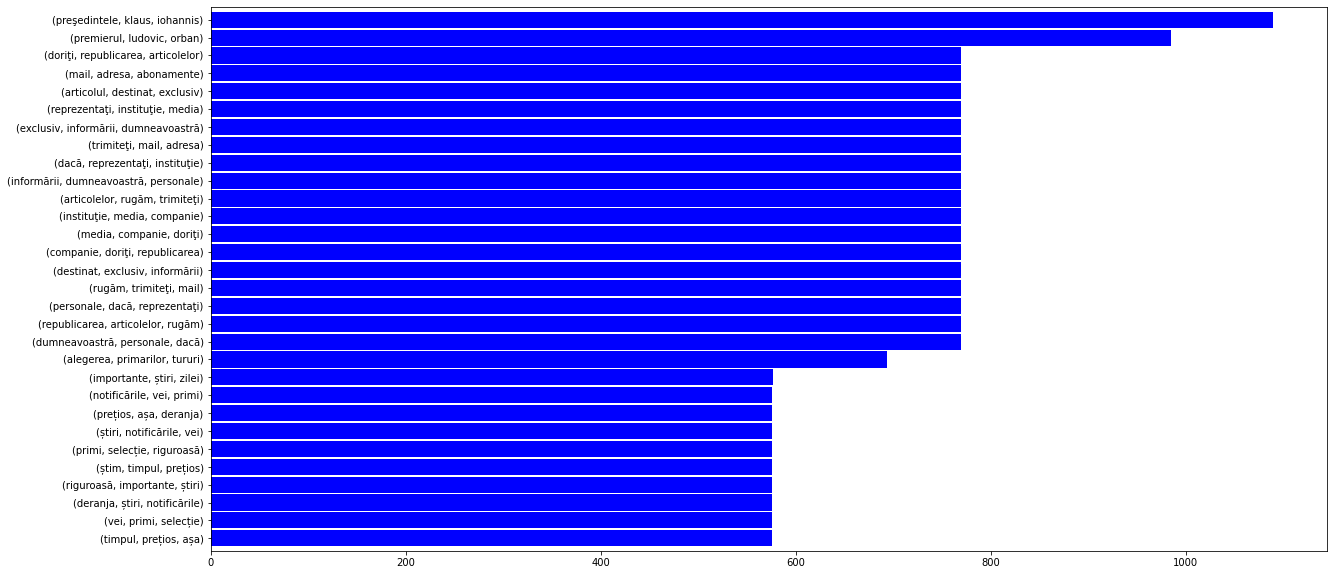

In [21]:
top_30_trigram_series.sort_values().plot.barh(color='blue', width=.9, figsize=(20, 10))